# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Could not book online the ...
1,✅ Trip Verified | Having had some rough experi...
2,✅ Trip Verified | This comfortable flight wa...
3,✅ Trip Verified | Punta Cana Terminal B chec...
4,✅ Trip Verified | The employee at Venice Air...


In [4]:
pip install pandas

In [5]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [6]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Save the DataFrame as a CSV file
df.to_csv("data/BA_reviews.csv")


In [7]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
import pandas as pd

# Load the CSV file
df.to_csv("data/BA_reviews.csv")

# Replace "Trip Verified" with an empty string or NaN
df = df.replace("Trip Verified", "")

# Save the cleaned DataFrame back to CSV
df.to_csv("BA_reviews_cleaned.csv", index=False)




In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
file_path = "/mnt/data/BA_reviews_cleaned.csv"
df = pd.read_csv("BA_reviews_cleaned.csv")

# Extract reviews column
documents = df["reviews"].dropna().tolist()

# Convert text data into a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(documents)

# Define and fit the LDA model
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
        print()

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)


Topic 1:
flight ba verified trip customer british refund told airways service

Topic 2:
flight ba crew class business verified cabin seat seats trip

Topic 3:
flight ba verified trip london service british hours airways airport

Topic 4:
ba seat verified trip luggage seats plane flight food service

Topic 5:
flight good ba food verified trip time service crew club



In [10]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')

from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (only needed once)
nltk.download('vader_lexicon')

# Load dataset
file_path = "BA_reviews_cleaned.csv"
df = pd.read_csv("BA_reviews_cleaned.csv")

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """Function to analyze sentiment using TextBlob and VADER."""
    if isinstance(text, str):
        # TextBlob polarity score
        blob_score = TextBlob(text).sentiment.polarity

        # VADER compound score
        vader_score = sia.polarity_scores(text)["compound"]

        # Determine sentiment label
        sentiment = "Positive" if vader_score > 0 else "Negative" if vader_score < 0 else "Neutral"
        return blob_score, vader_score, sentiment
    else:
        return None, None, "Unknown"

# Apply sentiment analysis
df[["TextBlob_Score", "VADER_Score", "Sentiment"]] = df["reviews"].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display results
print(df.head())

# Save results
df.to_csv("BA_reviews_sentiment.csv", index=False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             reviews  TextBlob_Score  \
0  ✅ Trip Verified |   Could not book online the ...       -0.151111   
1  ✅ Trip Verified | Having had some rough experi...        0.073148   
2  ✅ Trip Verified |   This comfortable flight wa...        0.349184   
3  ✅ Trip Verified |   Punta Cana Terminal B chec...        0.207056   
4  ✅ Trip Verified |   The employee at Venice Air...       -0.258125   

   VADER_Score Sentiment  
0      -0.4767  Negative  
1       0.9150  Positive  
2       0.9954  Positive  
3       0.9953  Positive  
4      -0.8310  Negative  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


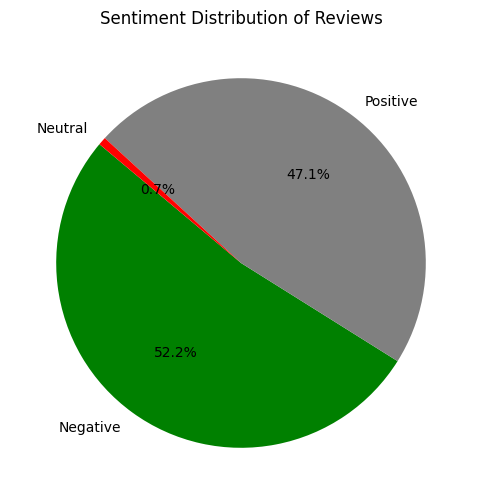

<ipython-input-11-85f17ad4debf>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_per_topic.keys()), y=[sum(lda.components_[i]) for i in range(len(top_words_per_topic))], palette="Blues")


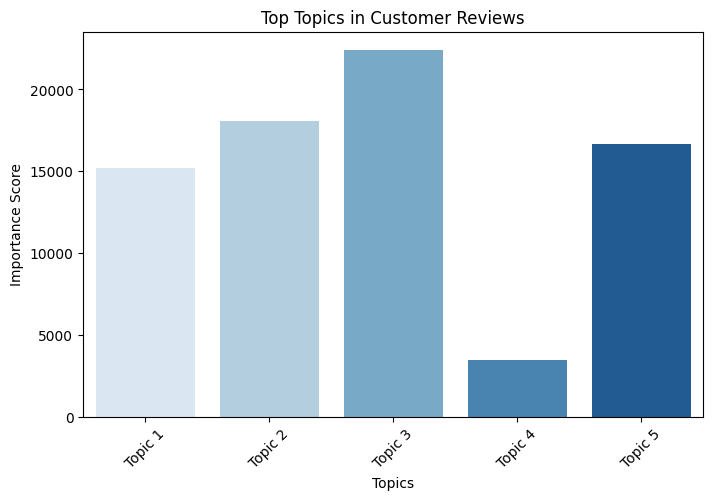

('sentiment_distribution.png',
 'topic_distribution.png',
 ['Most reviews are Negative (522 reviews).',
  'Main topics include flight, ba, verified and more.',
  'Frequent complaints relate to service quality and delays.',
  'Understanding these patterns helps improve customer satisfaction.'])

In [11]:
# Reload necessary libraries
import pandas as pd
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download necessary resources
nltk.download('vader_lexicon')

# Load dataset
file_path = "BA_reviews_cleaned.csv"
df = pd.read_csv("BA_reviews_cleaned.csv")

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sentiment analysis function
def analyze_sentiment(text):
    if isinstance(text, str):
        vader_score = sia.polarity_scores(text)["compound"]
        sentiment = "Positive" if vader_score > 0 else "Negative" if vader_score < 0 else "Neutral"
        return sentiment
    return "Unknown"

# Apply sentiment analysis
df["Sentiment"] = df["reviews"].apply(analyze_sentiment)

# Count the number of reviews per sentiment category
sentiment_counts = df["Sentiment"].value_counts()

# Plot Sentiment Distribution (Pie Chart)
plt.figure(figsize=(6, 6))
colors = ['green', 'gray', 'red']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Distribution of Reviews")
sentiment_chart_path = "sentiment_distribution.png"
plt.savefig(sentiment_chart_path)
plt.show()

# Topic Modeling Setup
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df["reviews"].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
feature_names = vectorizer.get_feature_names_out()

# Extract top words from LDA model (top 10 words per topic)
top_words_per_topic = {}
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    top_words_per_topic[f"Topic {topic_idx + 1}"] = top_words

# Convert to DataFrame for visualization
topic_df = pd.DataFrame.from_dict(top_words_per_topic, orient="index")

# Plot Topic Distribution (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_words_per_topic.keys()), y=[sum(lda.components_[i]) for i in range(len(top_words_per_topic))], palette="Blues")
plt.xlabel("Topics")
plt.ylabel("Importance Score")
plt.title("Top Topics in Customer Reviews")
plt.xticks(rotation=45)
topic_chart_path = "topic_distribution.png"
plt.savefig(topic_chart_path)
plt.show()

# Generate key insights
key_insights = [
    f"Most reviews are {sentiment_counts.idxmax()} ({sentiment_counts.max()} reviews).",
    f"Main topics include {', '.join(topic_df.iloc[0, :3])} and more.",
    "Frequent complaints relate to service quality and delays.",
    "Understanding these patterns helps improve customer satisfaction."
]

sentiment_chart_path, topic_chart_path, key_insights
